In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset and assigning it to the variable df
df = pd.read_csv("C:/Users/shant/Desktop/Data/netflixdf.csv",lineterminator='\n')

In [3]:
# Checking the first 5 rows and all columns of the data frame
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
# Checking information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
        9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
# Since many questions are based on Genres taking a sneek peak
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# Checking the stats for all numerical data
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# _Summary so far_
## Data frame has 9827 rows and 9 columns without any null values or duplicates
### release date needs to be set to datetime format
### Columns 'Overview', 'Original_language' and 'Poster_Url' are not required according to problem statement

In [8]:
# Converting release date to datetime as year is required

df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [9]:
# Since only year is required for analysis, keeping only year

df['Release_Date'] = df['Release_Date'].dt.year

In [10]:
# Dropping the columns 'Overview','Original_language' and 'Poster_Url\r'

coldrop = ['Overview','Original_Language','Poster_Url\r'] # List of columns to be dropped

df.drop(coldrop,axis=1,inplace=True) # Dropping the columns

# Categorizing the 'Vote_Average' column
## There will be 4 categories, namely
### popular
### average
### below_avg
### not_popular

In [11]:
# Defining a function to categorize columns
def categorize_col(df,col,labels):
    
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col],edges,labels = labels,duplicates = 'drop')
    return df

In [12]:
labels = ['not_popular','below_avg','average','popular'] # Defining the labels according to the format required by the function

categorize_col(df,'Vote_Average',labels) # Calling the function

# Checking for change
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [13]:
# Checking for the count of the votes
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

### The analysis done above reveals that there are 2467 movies that are not popular. As such, it is of no use to show such movies to recommendations.

In [14]:
# Dropping null values
df.dropna(inplace=True)

# Checking if drop is successful
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [15]:
### Splitting Genres column so that each movie is broken up into different Genres per row

df['Genre'] = df['Genre'].str.split(', ')

# Exploding the Genres so that each movie's genres are broken up and displayed in their own columns
df = df.explode('Genre').reset_index(drop=True)
df.head() # This is for a check

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [16]:
df.shape # There are now 25552 rows after exploding based on Genres

(25552, 6)

In [17]:
### Casting column into category

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes # Checking for successful casting

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [18]:
df.info() # Vote_Average and Genre are now category dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [19]:
df.nunique() # To check number of unique values

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

### Data pre-processing complete

# _VISUALIZATION_

In [20]:
# setting the style of the visualizations to a whitegrid
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [21]:
df['Genre'].describe() # Describing the Genre column for some insight

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

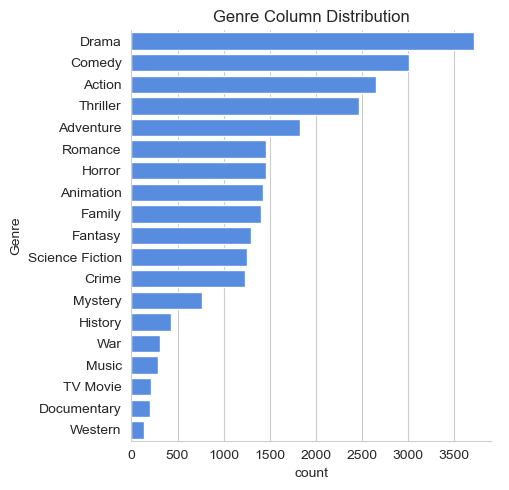

In [22]:
# Plotting a catplot to show the most frequent genre of movies
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title('Genre Column Distribution')
plt.tight_layout()
plt.show()

### Above analysis shows that Drama is the most frequent genre of movies released on Netflix, followed by Comedy, Action, Thriller and then Adventure

# Which has highest votes in Vote_Average column?

In [23]:
df['Vote_Average'].value_counts() # Checking the count of each rating

Vote_Average
average        6613
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64

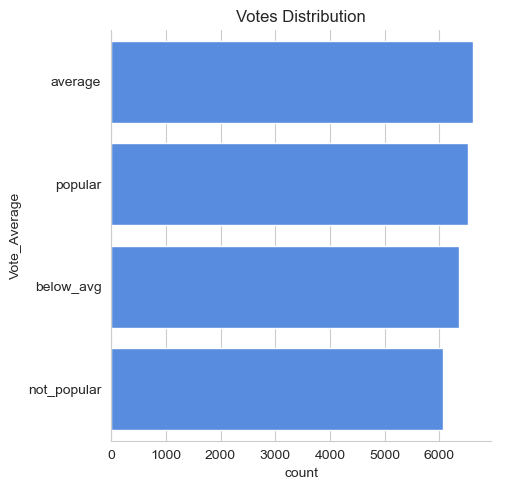

In [24]:
# Plotting a graph to show highest count of ratings (Vote_Average)
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#4287f5')
plt.title('Votes Distribution')
plt.tight_layout()
plt.show()

### Average moveies have highest vote count in Vote_Average column

# What movie got the highest popularity? What is it's genre?

In [25]:
df[df['Popularity'] == df['Popularity'].max()] # Checking for most popular movie and its Genres

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Spider-Man: No Way Home is the movie with the highest popularity and it belongs to the Genre of Action, Adventure and Science Fiction

# What movie got the lowest popularity? What is it's genre?

In [26]:
df[df['Popularity'] == df['Popularity'].min()] # Checking for least popular movie and its Genres

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


### There are two movies with the lowest popularity. The first is The United States vs. Billie Holiday which belongs to the Genres Music, Drama and History. The second is the movie Threads which belongs to the Genres War, Drama, Science Fiction

# Which Year has the most Movies released

In [27]:
df['Release_Date'].value_counts().head() # For insight on top 5 release years for movies

Release_Date
2021    1636
2018    1384
2017    1365
2019    1271
2016    1209
Name: count, dtype: int64

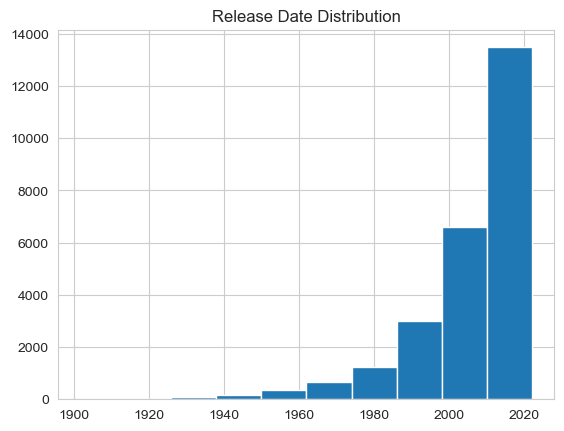

In [28]:
# Plotting graph to show the distribution of number of movies released according to year
df['Release_Date'].hist()
plt.title("Release Date Distribution")
plt.show()

### Highest number of movies were released in and around the year 2020

# _Summary_

## _The above analysis reveals the following:_

### Drama is the most frequent genre of movies released on Netflix, followed by Comedy, Action, Thriller and then Adventure
### Average moveies have highest vote count in Vote_Average column
### Spider-Man: No Way Home is the movie with the highest popularity and it belongs to the Genre of Action, Adventure and Science Fiction
### There are two movies with the lowest popularity. The first is The United States vs. Billie Holiday which belongs to the Genres Music, Drama and History. The second is the movie Threads which belongs to the Genres War, Drama, Science Fiction
### Highest number of movies were released in and around the year 2020